In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [3]:
movies = pd.read_csv("C:\\Users\\Dell\\Downloads\\IMDB-Movie-Data.csv")

In [4]:
movies.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [5]:
movies.shape

(1000, 12)

In [75]:
movies.describe() ##Revenue have some major outliers ## max 

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [5]:
movies.Votes.max() ##10^6

1791916

In [6]:
movies.info() ## revenue and metascore values are null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## Now checking how many movies are released in particular year

In [8]:
movies.Year.value_counts().sort_index(ascending = False)

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2009     51
2008     52
2007     53
2006     44
Name: Year, dtype: int64

In [21]:
comedy = movies[movies['Genre'].str.contains('Comedy')] 
comedy

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
13,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
14,15,Colossal,"Action,Comedy,Drama",Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.87,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,Your Highness,"Adventure,Comedy,Fantasy","When Prince Fabious's bride is kidnapped, he g...",David Gordon Green,"Danny McBride, Natalie Portman, James Franco, ...",2011,102,5.6,87904,21.56,31.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


## Analysing top Genres

In [87]:
movies.Genre.value_counts().sort_values(ascending = False).head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

In [26]:
top_10_genres = movies.groupby(by = "Genre").Rating.mean().sort_values(ascending = False).head(10)

Genre
Animation,Drama,Fantasy       8.60
Drama,Family,Music            8.50
Drama,Western                 8.40
Animation,Drama,Romance       8.40
Adventure,Drama,Sci-Fi        8.30
Adventure,Drama,War           8.30
Biography,Comedy,Crime        8.20
Drama,Mystery,War             8.20
Drama,Fantasy,War             8.20
Animation,Adventure,Family    8.15
Name: Rating, dtype: float64

In [90]:
top3 = list(movies.Genre.value_counts().sort_values(ascending = False).head(3).index)
print(top3)

['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Drama,Romance']


In [91]:
movies['topgenre'] = np.where(movies.Genre.isin(top3),'popular genre','Not so popular')
movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Category,topgenre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,high,popular genre
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,high,Not so popular
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,high,Not so popular
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,high,Not so popular
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,medium,Not so popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0,medium,Not so popular
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,low,Not so popular
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,medium,Not so popular
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0,low,Not so popular


In [92]:
movies.iloc[:,[7,8,13]].groupby(by = 'topgenre').mean()

,Runtime (Minutes),Rating
topgenre,,
Not so popular,112.611303,6.714302
popular genre,116.827068,6.781203


### we can see there is not much difference in rating but we can say popular genre have more runtime

In [105]:
movies.loc[movies.topgenre == "popular genre",['Rating','Genre']].groupby(by = 'Genre').mean()

,Rating
Genre,
"Action,Adventure,Sci-Fi",6.724000
"Comedy,Drama,Romance",6.651429
Drama,6.935417


## Average duration 

In [80]:
movies.iloc[:,7].mean() ## since runtime(minutes) is showing error

113.172

In [86]:
movies.groupby(by = "Year").mean().iloc[:,1].sort_values(ascending = False)

Year
2007    121.622642
2006    120.840909
2012    119.109375
2009    116.117647
2013    116.065934
2011    114.603175
2015    114.496063
2014    114.489796
2010    111.133333
2008    110.826923
2016    107.373737
Name: Runtime (Minutes), dtype: float64

## Percentage of movies rating 

In [27]:
movies['Category'] = np.where(movies['Rating'] >= 7,"high",np.where(movies['Rating'] >= 6,"medium","low"))

In [28]:
movies.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,high
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,high
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,high
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,high
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,medium
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,medium
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,high
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,medium
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,high
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,high


In [30]:
movies.Category.value_counts()

high      445
medium    371
low       184
Name: Category, dtype: int64

In [33]:
movies_category = movies.Category.value_counts(normalize = True)*100 ## normalize turn data into percentage

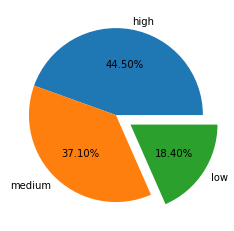

In [47]:
plt.pie(movies_category,labels = movies_category.index,autopct = "%1.2f%%",explode = [0,0,0.2])
plt.show()

 ## 2 Way Tables

In [48]:
pd.crosstab(movies.Year,movies.Category)

Category,high,low,medium
Year,,,
2006,25,3,16
2007,39,5,9
2008,26,8,18
2009,28,8,15
2010,27,9,24
2011,31,9,23
2012,34,8,22
2013,45,13,33
2014,42,13,43


In [49]:
pd.crosstab(movies.Year,movies.Category,normalize = True)*100 ## so total of entire table will be 100

Category,high,low,medium
Year,,,
2006,2.5,0.3,1.6
2007,3.9,0.5,0.9
2008,2.6,0.8,1.8
2009,2.8,0.8,1.5
2010,2.7,0.9,2.4
2011,3.1,0.9,2.3
2012,3.4,0.8,2.2
2013,4.5,1.3,3.3
2014,4.2,1.3,4.3


In [55]:
pd.crosstab(movies.Year,movies.Category,normalize = 'index')*100 ##percentage across the row 
## don't know how to round this value
## to find percentage across column we can write normalize = 'column'

Category,high,low,medium
Year,,,
2006,56.818182,6.818182,36.363636
2007,73.584906,9.433962,16.981132
2008,50.000000,15.384615,34.615385
2009,54.901961,15.686275,29.411765
2010,45.000000,15.000000,40.000000
2011,49.206349,14.285714,36.507937
2012,53.125000,12.500000,34.375000
2013,49.450549,14.285714,36.263736
2014,42.857143,13.265306,43.877551


## heatmap

<AxesSubplot:xlabel='Category', ylabel='Year'>

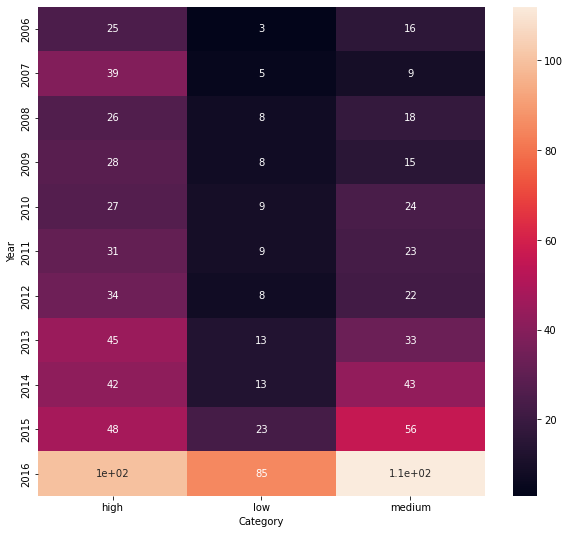

In [61]:
plt.figure(figsize = (10,9))
sns.heatmap(pd.crosstab(movies.Year,movies.Category),annot = True)

In [65]:
movies.groupby(by = "Year").Votes.mean().sort_values(ascending = False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14c50868a30>,
 'caps': [<matplotlib.lines.Line2D at 0x14c50877190>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c508686a0>],
 'medians': [<matplotlib.lines.Line2D at 0x14c50877850>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c50877be0>],
 'means': []}

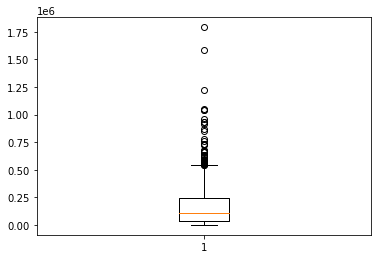

In [66]:
plt.boxplot(movies.Votes) ##Votes have many outliers

<AxesSubplot:xlabel='Votes', ylabel='Density'>

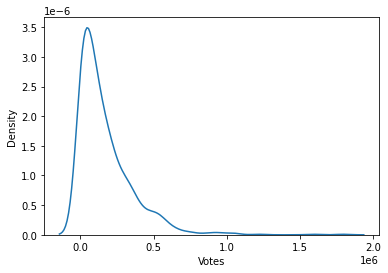

In [67]:
sns.kdeplot(movies.Votes) ##it is left skewed we can see this in box plot also

## Probability of movies with rating greater than 6

In [11]:
a = (movies.Rating>6).sum()/len(movies.Rating)*100 ##79% of data have rating more than 6

<AxesSubplot:xlabel='Rating', ylabel='Density'>

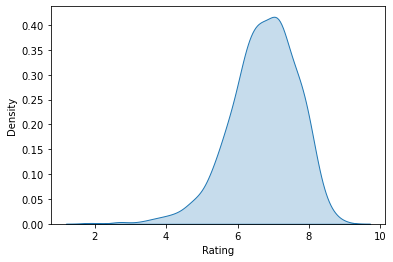

In [17]:
ppt = sns.kdeplot(movies.Rating,shade = True)
ppt

In [20]:
a = movies.Rating.mean()
b = movies.Rating.std()
c = ss.norm.cdf(x = 6,loc = a,scale = b) ## probability of rating less than 6
1 -c ## rating above 6

0.7778475290364276

In [9]:
top10revenue = movies.iloc[:,[1,2,5,10]].sort_values(by = "Revenue (Millions)",ascending = False).head(10)
top10revenue

,Title,Genre,Actors,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",936.63
87,Avatar,"Action,Adventure,Fantasy","Sam Worthington, Zoe Saldana, Sigourney Weaver...",760.51
85,Jurassic World,"Action,Adventure,Sci-Fi","Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",652.18
76,The Avengers,"Action,Sci-Fi","Robert Downey Jr., Chris Evans, Scarlett Johan...",623.28
54,The Dark Knight,"Action,Crime,Drama","Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",533.32
12,Rogue One,"Action,Adventure,Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",532.17
119,Finding Dory,"Animation,Adventure,Comedy","Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",486.29
94,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",458.99
124,The Dark Knight Rises,"Action,Thriller","Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",448.13
578,The Hunger Games: Catching Fire,"Action,Adventure,Mystery","Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",424.65


### All the action movies earns highest revenue

In [16]:
movies[movies['Genre'].str.contains('Action')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,3 Days to Kill,"Action,Drama,Thriller",A dying CIA agent trying to reconnect with his...,McG,"Kevin Costner, Hailee Steinfeld, Connie Nielse...",2014,117,6.2,73567,30.69,40.0
968,969,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83,3.5,1210,NaN,37.0
969,970,The Lone Ranger,"Action,Adventure,Western",Native American warrior Tonto recounts the unt...,Gore Verbinski,"Johnny Depp, Armie Hammer, William Fichtner,To...",2013,150,6.5,190855,89.29,NaN
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0


In [18]:
action = movies[movies['Genre'].str.contains('Action')]
(action["Revenue (Millions)"] > 300).sum()

29

#### so the probalility of Action movie to earn revenue greater than 300 million is--

In [20]:
(29/303)*100

9.570957095709572

In [21]:
movies[movies['Genre'].str.contains('Action,Adventure')]["Revenue (Millions)"] > 300

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Superman Returns,"Action,Adventure,Sci-Fi","Superman reappears after a long absence, but i...",Bryan Singer,"Brandon Routh, Kevin Spacey, Kate Bosworth, Ja...",2006,154,6.1,246797,200.07,72.0
948,949,After Earth,"Action,Adventure,Sci-Fi",A crash landing leaves Kitai Raige and his fat...,M. Night Shyamalan,"Jaden Smith, David Denman, Will Smith,Sophie O...",2013,100,4.9,166512,60.52,33.0
969,970,The Lone Ranger,"Action,Adventure,Western",Native American warrior Tonto recounts the unt...,Gore Verbinski,"Johnny Depp, Armie Hammer, William Fichtner,To...",2013,150,6.5,190855,89.29,NaN
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0


In [22]:
(movies[movies['Genre'].str.contains('Action,Adventure')]["Revenue (Millions)"] > 300).sum()

24

#### So the probability of action,adventure to earn revenue of 300 is

In [24]:
(24/155)*100

15.483870967741936

In [26]:
movies[movies['Genre'].str.contains('Action,Adventure,Sci-Fi')].shape

(50, 12)

In [27]:
(movies[movies['Genre'].str.contains('Action,Adventure,Sci-Fi')]["Revenue (Millions)"] > 300).sum()

13

In [29]:
(13/50)*100

26.0

In [30]:
(movies[movies['Genre'].str.contains('Action,Adventure,Sci-Fi')]["Revenue (Millions)"] > 200).sum()

23

In [31]:
(23/50)*100

46.0

In [32]:
(movies[movies['Genre'].str.contains('Action,Adventure,Sci-Fi')]["Revenue (Millions)"] > 100).sum()

39

In [34]:
(39/50)*100

78.0

In [16]:
robert = movies[movies['Actors'].str.contains('Robert Downey Jr.')] 
robert.sort_values(by = "Revenue (Millions)",ascending = False)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
279,280,Iron Man Three,"Action,Adventure,Sci-Fi",When Tony Stark's world is torn apart by a for...,Shane Black,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow...",2013,130,7.2,591023,408.99,62.0
35,36,Captain America: Civil War,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147,7.9,411656,408.08,75.0
203,204,Iron Man,"Action,Adventure,Sci-Fi","After being held captive in an Afghan cave, bi...",Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Terrence H...",2008,126,7.9,737719,318.30,79.0
450,451,Iron Man 2,"Action,Adventure,Sci-Fi",With the world now aware of his identity as Ir...,Jon Favreau,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt...",2010,124,7.0,556666,312.06,57.0
281,282,Sherlock Holmes,"Action,Adventure,Crime",Detective Sherlock Holmes and his stalwart par...,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,128,7.6,501769,209.02,57.0
465,466,Sherlock Holmes: A Game of Shadows,"Action,Adventure,Crime",Sherlock Holmes and his sidekick Dr. Watson jo...,Guy Ritchie,"Robert Downey Jr., Jude Law, Jared Harris, Rac...",2011,129,7.5,357436,186.83,48.0
177,178,Tropic Thunder,"Action,Comedy","Through a series of freak occurrences, a group...",Ben Stiller,"Ben Stiller, Jack Black, Robert Downey Jr., Je...",2008,107,7.0,321442,110.42,71.0
708,709,The Judge,"Crime,Drama",Big-city lawyer Hank Palmer returns to his chi...,David Dobkin,"Robert Downey Jr., Robert Duvall, Vera Farmiga...",2014,141,7.4,146812,47.11,48.0


In [4]:
chris = movies[movies['Actors'].str.contains('Chris Evans')] 
chris_movies = chris.sort_values(by = "Revenue (Millions)",ascending = False)
chris_movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
35,36,Captain America: Civil War,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147,7.9,411656,408.08,75.0
216,217,Captain America: The Winter Soldier,"Action,Adventure,Sci-Fi",As Steve Rogers struggles to embrace his role ...,Anthony Russo,"Chris Evans, Samuel L. Jackson,Scarlett Johans...",2014,136,7.8,542362,259.75,70.0
195,196,Captain America: The First Avenger,"Action,Adventure,Sci-Fi","Steve Rogers, a rejected military soldier tran...",Joe Johnston,"Chris Evans, Hugo Weaving, Samuel L. Jackson,H...",2011,124,6.9,547368,176.64,66.0
943,944,What's Your Number?,"Comedy,Romance",A woman looks back at the past nineteen men sh...,Mark Mylod,"Anna Faris, Chris Evans, Ari Graynor, Blythe D...",2011,106,6.1,62095,13.99,35.0
315,316,Snowpiercer,"Action,Drama,Sci-Fi",Set in a future where a failed climate-change ...,Bong Joon Ho,"Chris Evans, Jamie Bell, Tilda Swinton, Ed Harris",2013,126,7.0,199048,4.56,84.0
588,589,Sunshine,"Adventure,Sci-Fi,Thriller",A team of international astronauts are sent on...,Danny Boyle,"Cillian Murphy, Rose Byrne, Chris Evans, Miche...",2007,107,7.3,199860,3.68,64.0
784,785,Before We Go,"Comedy,Drama,Romance",Two strangers stuck in Manhattan for the night...,Chris Evans,"Chris Evans, Alice Eve, Emma Fitzpatrick, John...",2014,95,6.9,31370,0.04,31.0


### Probability of movies to earn well if they have chris Evans as a Actor

In [29]:
3/len(chris_movies)*100

33.33333333333333

##### the probability of movies to earn well when it is Action,Adventure,scifi having chris Evans in it

In [40]:
chris_movies[chris_movies['Genre'].str.contains('Action,Adventure,Sci-Fi')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
35,36,Captain America: Civil War,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147,7.9,411656,408.08,75.0
216,217,Captain America: The Winter Soldier,"Action,Adventure,Sci-Fi",As Steve Rogers struggles to embrace his role ...,Anthony Russo,"Chris Evans, Samuel L. Jackson,Scarlett Johans...",2014,136,7.8,542362,259.75,70.0
195,196,Captain America: The First Avenger,"Action,Adventure,Sci-Fi","Steve Rogers, a rejected military soldier tran...",Joe Johnston,"Chris Evans, Hugo Weaving, Samuel L. Jackson,H...",2011,124,6.9,547368,176.64,66.0


In [41]:
movies.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


In [42]:
movies.corr(method='kendall')

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.209723,-0.152392,-0.157047,-0.140587,-0.156228,-0.129057
Year,-0.209723,1.000000,-0.124249,-0.166182,-0.446809,-0.167454,-0.045195
Runtime (Minutes),-0.152392,-0.124249,1.000000,0.271775,0.285313,0.170198,0.136005
Rating,-0.157047,-0.166182,0.271775,1.000000,0.376319,0.109769,0.489449
Votes,-0.140587,-0.446809,0.285313,0.376319,1.000000,0.511008,0.191728
Revenue (Millions),-0.156228,-0.167454,0.170198,0.109769,0.511008,1.000000,0.040646
Metascore,-0.129057,-0.045195,0.136005,0.489449,0.191728,0.040646,1.000000
